In [1]:
%cd ~/../kaggle/working
!git clone https://github.com/RSourceCode/SAM2.git

/kaggle/working
Cloning into 'SAM2'...
remote: Enumerating objects: 1069, done.
remote: Total 1069 (delta 0), reused 0 (delta 0), pack-reused 1069 (from 1)
Receiving objects: 100% (1069/1069), 128.56 MiB | 37.95 MiB/s, done.
Resolving deltas: 100% (360/360), done.


In [2]:
!pip install sam2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
%cd SAM2
!pip install -e .

/kaggle/working/SAM2
Obtaining file:///kaggle/working/SAM2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=sam_2-1.0-0.editable-cp311-cp311-linux_x86_64.whl size=13856 sha256=df49b001bae2a27c450316b730801753bcc59d9d268eeda5f0c1ce066f2905e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-vd2k3sz3/wheels/18/a6/1f/19fc11673cf3560450a124f378555907f624f18572f93b54f5
Successfully built SAM-2


In [4]:
%cd checkpoints
!bash download_ckpts.sh
%cd ../notebooks

/kaggle/working/SAM2/checkpoints
--2025-07-07 06:30:07--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.44, 18.238.176.19, 18.238.176.126, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M   187MB/s    in 0.8s    

2025-07-07 06:30:07 (187 MB/s) - ‘sam2.1_hiera_tiny.pt’ saved [156008466/156008466]

--2025-07-07 06:30:07--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.126, 18.238.176.44, 18.238.176.19, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.126|:443... connected.
HTTP request sent, awaiting response.

In [5]:
# Read image from url helper function
import cv2
import urllib.request
import numpy as np

def imread_from_url(url):
    try:
        req = urllib.request.urlopen(url)
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        img = cv2.imdecode(arr, -1)
        return img
    except Exception as e:
        print(f"Error reading image from URL: {e}")
        return None

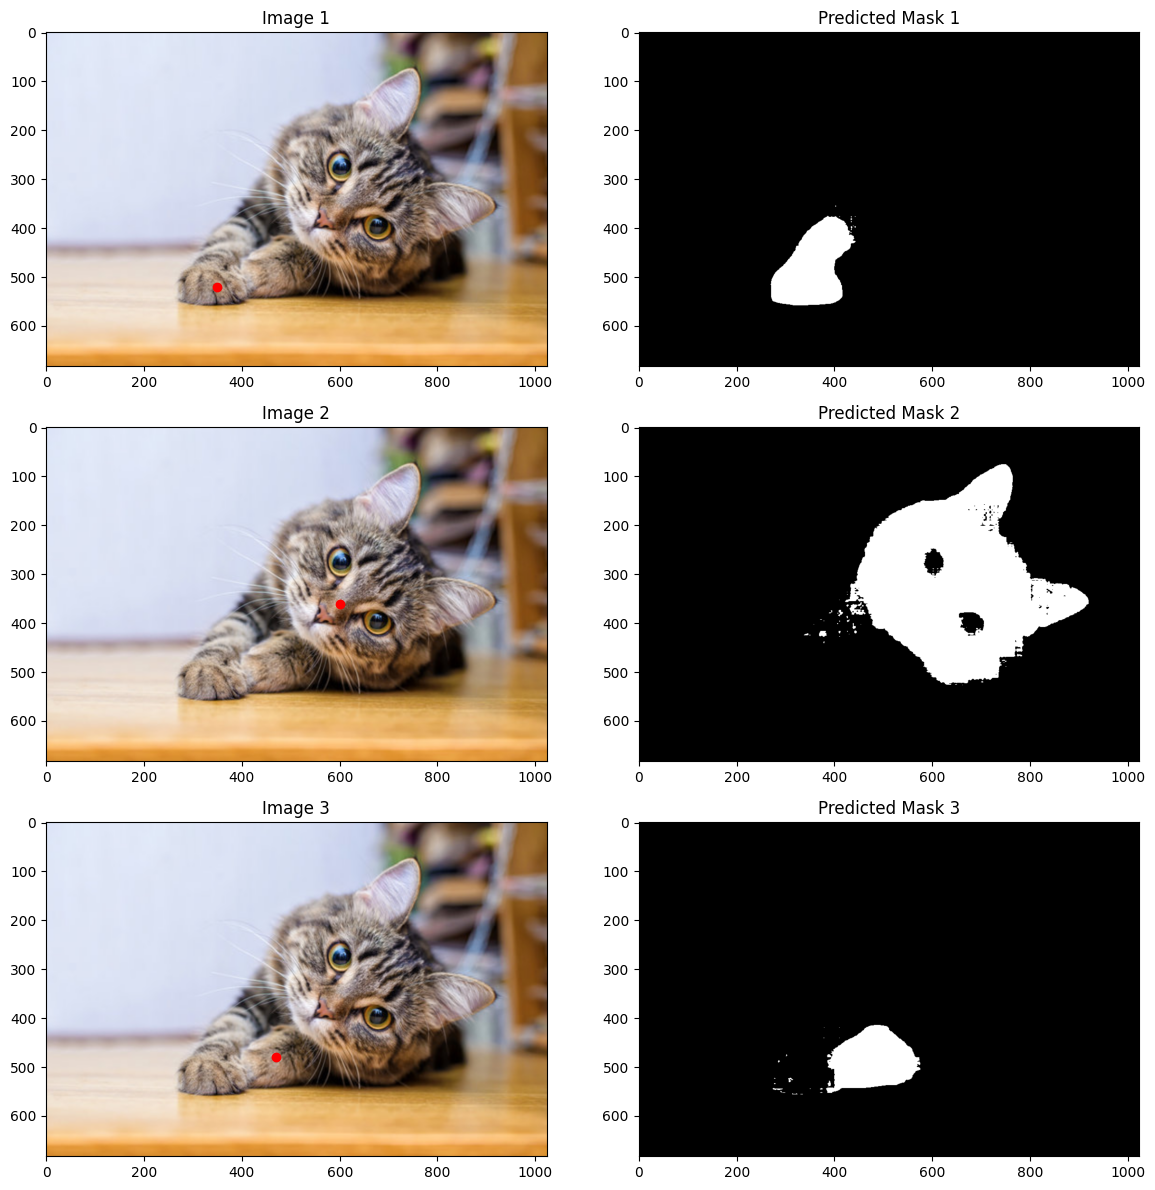

In [6]:
# segment image region using  fine tune model
# See Train.py on how to fine tune/train the model
import numpy as np
import torch
import cv2
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

# use bfloat16 for the entire script (memory efficient)
torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

# Load image


# image_path = r"sample_image.jpg" # path to image
# mask_path = r"sample_mask.png" # path to mask, the mask will define the image region to segment

def read_image(): # read and resize image and mask
        # img = cv2.imread(image_path)[...,::-1]  # read image as rgb
        img = imread_from_url("https://t3.ftcdn.net/jpg/02/36/99/22/360_F_236992283_sNOxCVQeFLd5pdqaKGh8DRGMZy7P4XKm.jpg")
        # mask = cv2.imread(mask_path,0) # mask of the region we want to segment

        # Resize image to maximum size of 1024

        r = np.min([1024 / img.shape[1], 1024 / img.shape[0]])
        img = cv2.resize(img, (int(img.shape[1] * r), int(img.shape[0] * r)))
        # mask = cv2.resize(mask, (int(mask.shape[1] * r), int(mask.shape[0] * r)),interpolation=cv2.INTER_NEAREST)
        return img
image = read_image()
num_samples = 30 # number of points/segment to sample
# def get_points(mask,num_points): # Sample points inside the input mask
#         points=[]
#         for i in range(num_points):
#             coords = np.argwhere(mask > 0)
#             yx = np.array(coords[np.random.randint(len(coords))])
#             points.append([[yx[1], yx[0]]])
        
        # return np.array(points)
# input_points = get_points(mask,num_samples)

input_points = np.array([[[[350,520]]],[[[600,360]]],[[[470,480]]]])
# read image and sample points


# Load model you need to have pretrained model already made
sam2_checkpoint = "../checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")

# Build net and load weights
predictor = SAM2ImagePredictor(sam2_model)
predictor.model.load_state_dict(torch.load("../../../input/part-model/part-model1.torch"))

# predict mask
prd_masks = []
for input_point in input_points:
    with torch.no_grad():
            predictor.set_image(image)
            masks, scores, logits = predictor.predict(
                point_coords=input_point,
                point_labels=np.ones([input_point.shape[0],1])
            )
    prd_masks.append(masks[0])

# Short predicted masks from high to low score

# masks=masks[:,0].astype(bool)
# shorted_masks = masks[np.argsort(scores[:,0])][::-1].astype(bool)

# # Stitch predicted mask into one segmentation mask

# seg_map = np.zeros_like(shorted_masks[0],dtype=np.uint8)
# occupancy_mask = np.zeros_like(shorted_masks[0],dtype=bool)
# for i in range(shorted_masks.shape[0]):
#     mask = shorted_masks[i]
#     if (mask*occupancy_mask).sum()/mask.sum()>0.15: continue
#     mask[occupancy_mask]=0
#     seg_map[mask]=i+1
#     occupancy_mask[mask]=1

# # create colored annotation map
# height, width = seg_map.shape

# # Create an empty RGB image for the colored annotation
# rgb_image = np.zeros((seg_map.shape[0], seg_map.shape[1], 3), dtype=np.uint8)
# for id_class in range(1,seg_map.max()+1):
#     rgb_image[seg_map == id_class] = [np.random.randint(255), np.random.randint(255), np.random.randint(255)]

# save and display

# cv2.imwrite("annotation.png",rgb_image)
# cv2.imwrite("mix.png",(rgb_image/2+image/2).astype(np.uint8))
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(input_points), 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten for easier indexing (0 to 7)

for i in range(len(input_points)):
    # Plot original image with red point
    axes[2*i].imshow(image[:, :, ::-1])  # Convert BGR to RGB
    axes[2*i].scatter(input_points[i][0][0][0], input_points[i][0][0][1], color='red')
    axes[2*i].set_title(f"Image {i+1}")
    axes[2*i].axis('on')

    # Plot predicted mask
    axes[2*i + 1].imshow(prd_masks[i], cmap='gray')
    axes[2*i + 1].set_title(f"Predicted Mask {i+1}")
    axes[2*i + 1].axis('on')

plt.tight_layout()
plt.show()

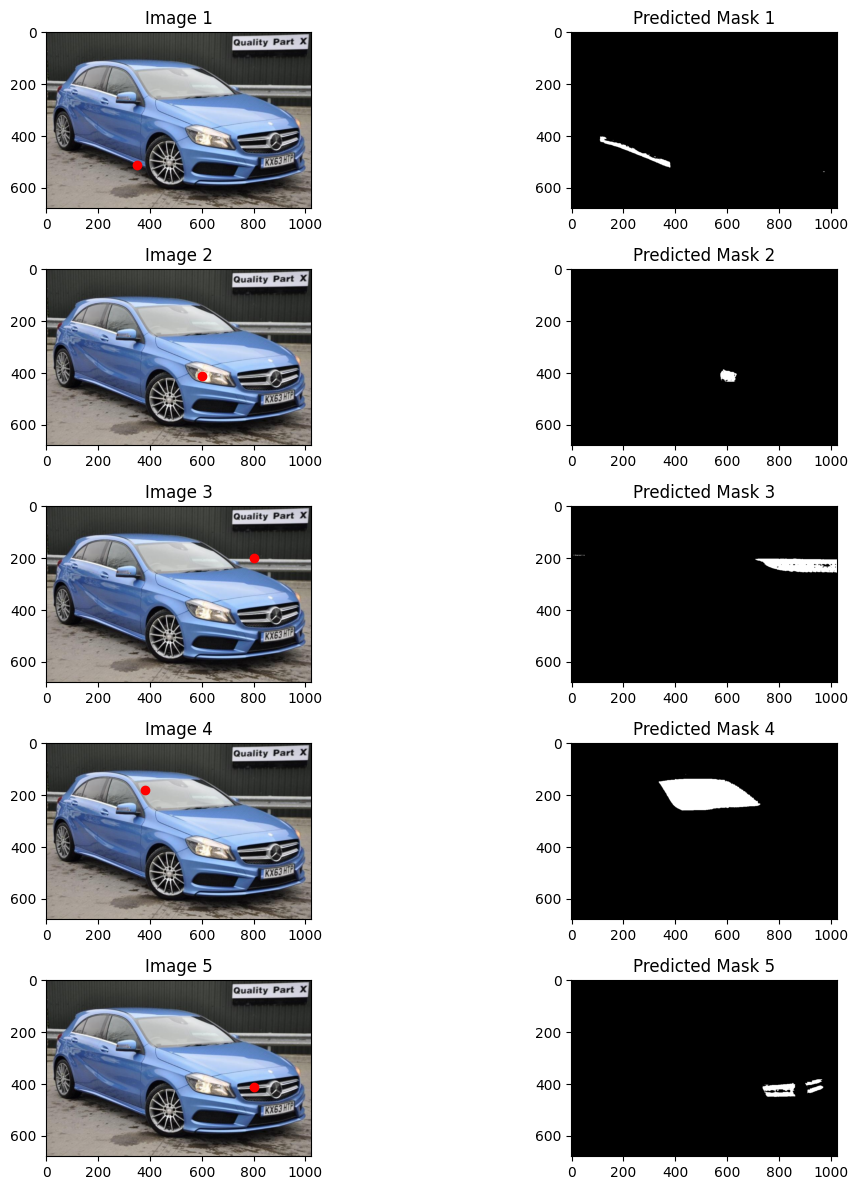

In [7]:
# segment image region using  fine tune model
# See Train.py on how to fine tune/train the model
import numpy as np
import torch
import cv2
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

# use bfloat16 for the entire script (memory efficient)
torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

# Load image


# image_path = r"sample_image.jpg" # path to image
# mask_path = r"sample_mask.png" # path to mask, the mask will define the image region to segment

def read_image(): # read and resize image and mask
        # img = cv2.imread(image_path)[...,::-1]  # read image as rgb
        img = imread_from_url("https://i.ebayimg.com/00/s/NTMxWDgwMA==/z/4IEAAOSw5utabG72/$_86.JPG")
        # mask = cv2.imread(mask_path,0) # mask of the region we want to segment

        # Resize image to maximum size of 1024

        r = np.min([1024 / img.shape[1], 1024 / img.shape[0]])
        img = cv2.resize(img, (int(img.shape[1] * r), int(img.shape[0] * r)))
        # mask = cv2.resize(mask, (int(mask.shape[1] * r), int(mask.shape[0] * r)),interpolation=cv2.INTER_NEAREST)
        return img
image = read_image()
num_samples = 30 # number of points/segment to sample
# def get_points(mask,num_points): # Sample points inside the input mask
#         points=[]
#         for i in range(num_points):
#             coords = np.argwhere(mask > 0)
#             yx = np.array(coords[np.random.randint(len(coords))])
#             points.append([[yx[1], yx[0]]])
        
        # return np.array(points)
# input_points = get_points(mask,num_samples)

input_points = np.array([[[[350,510]]],[[[600,410]]],[[[800,200]]],[[[380,180]]],[[[800,410]]]])
# read image and sample points


# Load model you need to have pretrained model already made
sam2_checkpoint = "../checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")

# Build net and load weights
predictor = SAM2ImagePredictor(sam2_model)
predictor.model.load_state_dict(torch.load("../../../input/part-model/part-model1.torch"))

# predict mask
prd_masks = []
for input_point in input_points:
    with torch.no_grad():
            predictor.set_image(image)
            masks, scores, logits = predictor.predict(
                point_coords=input_point,
                point_labels=np.ones([input_point.shape[0],1])
            )
    prd_masks.append(masks[0])

# Short predicted masks from high to low score

# masks=masks[:,0].astype(bool)
# shorted_masks = masks[np.argsort(scores[:,0])][::-1].astype(bool)

# # Stitch predicted mask into one segmentation mask

# seg_map = np.zeros_like(shorted_masks[0],dtype=np.uint8)
# occupancy_mask = np.zeros_like(shorted_masks[0],dtype=bool)
# for i in range(shorted_masks.shape[0]):
#     mask = shorted_masks[i]
#     if (mask*occupancy_mask).sum()/mask.sum()>0.15: continue
#     mask[occupancy_mask]=0
#     seg_map[mask]=i+1
#     occupancy_mask[mask]=1

# # create colored annotation map
# height, width = seg_map.shape

# # Create an empty RGB image for the colored annotation
# rgb_image = np.zeros((seg_map.shape[0], seg_map.shape[1], 3), dtype=np.uint8)
# for id_class in range(1,seg_map.max()+1):
#     rgb_image[seg_map == id_class] = [np.random.randint(255), np.random.randint(255), np.random.randint(255)]

# save and display

# cv2.imwrite("annotation.png",rgb_image)
# cv2.imwrite("mix.png",(rgb_image/2+image/2).astype(np.uint8))
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(input_points), 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten for easier indexing (0 to 7)

for i in range(len(input_points)):
    # Plot original image with red point
    axes[2*i].imshow(image[:, :, ::-1])  # Convert BGR to RGB
    axes[2*i].scatter(input_points[i][0][0][0], input_points[i][0][0][1], color='red')
    axes[2*i].set_title(f"Image {i+1}")
    axes[2*i].axis('on')

    # Plot predicted mask
    axes[2*i + 1].imshow(prd_masks[i], cmap='gray')
    axes[2*i + 1].set_title(f"Predicted Mask {i+1}")
    axes[2*i + 1].axis('on')

plt.tight_layout()
plt.show()

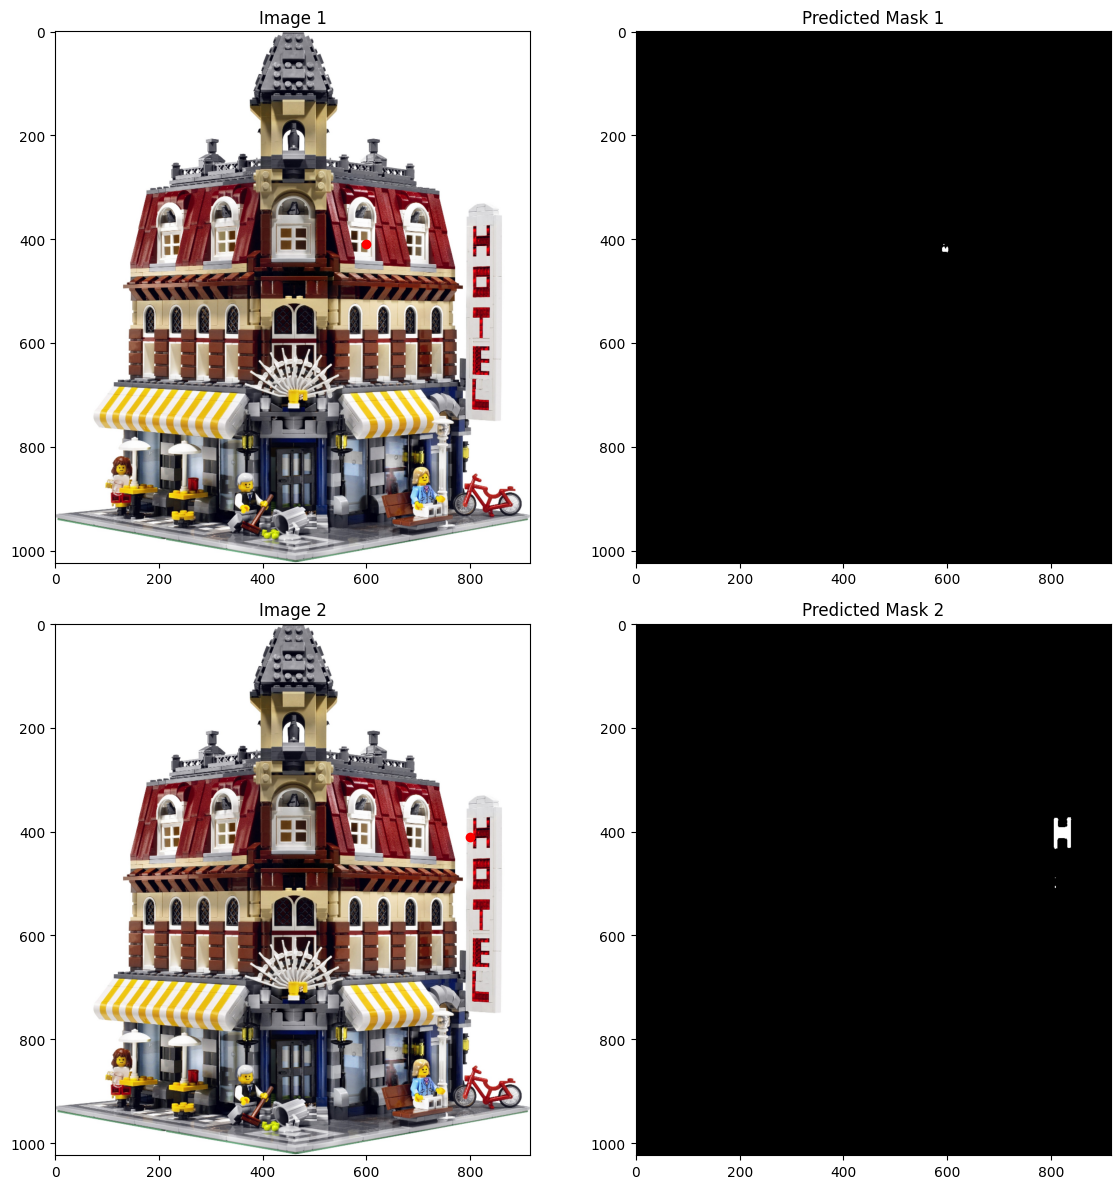

In [8]:
# segment image region using  fine tune model
# See Train.py on how to fine tune/train the model
import numpy as np
import torch
import cv2
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

# use bfloat16 for the entire script (memory efficient)
torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

def read_image(): # read and resize image and mask
        img = imread_from_url("https://images.brickset.com/sets/large/10182-1.jpg")

        # Resize image to maximum size of 1024

        r = np.min([1024 / img.shape[1], 1024 / img.shape[0]])
        img = cv2.resize(img, (int(img.shape[1] * r), int(img.shape[0] * r)))
        
        return img
image = read_image()
num_samples = 30 # number of points/segment to sample

input_points = np.array([[[[600,410]]],[[[800,410]]]])
# read image and sample points


# Load model you need to have pretrained model already made
sam2_checkpoint = "../checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")

# Build net and load weights
predictor = SAM2ImagePredictor(sam2_model)
predictor.model.load_state_dict(torch.load("../../../input/part-model/part-model1.torch"))

# predict mask
prd_masks = []
for input_point in input_points:
    with torch.no_grad():
            predictor.set_image(image)
            masks, scores, logits = predictor.predict(
                point_coords=input_point,
                point_labels=np.ones([input_point.shape[0],1])
            )
    prd_masks.append(masks[0])

import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(input_points), 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten for easier indexing (0 to 7)

for i in range(len(input_points)):
    # Plot original image with red point
    axes[2*i].imshow(image[:, :, ::-1])  # Convert BGR to RGB
    axes[2*i].scatter(input_points[i][0][0][0], input_points[i][0][0][1], color='red')
    axes[2*i].set_title(f"Image {i+1}")
    axes[2*i].axis('on')

    # Plot predicted mask
    axes[2*i + 1].imshow(prd_masks[i], cmap='gray')
    axes[2*i + 1].set_title(f"Predicted Mask {i+1}")
    axes[2*i + 1].axis('on')

plt.tight_layout()
plt.show()

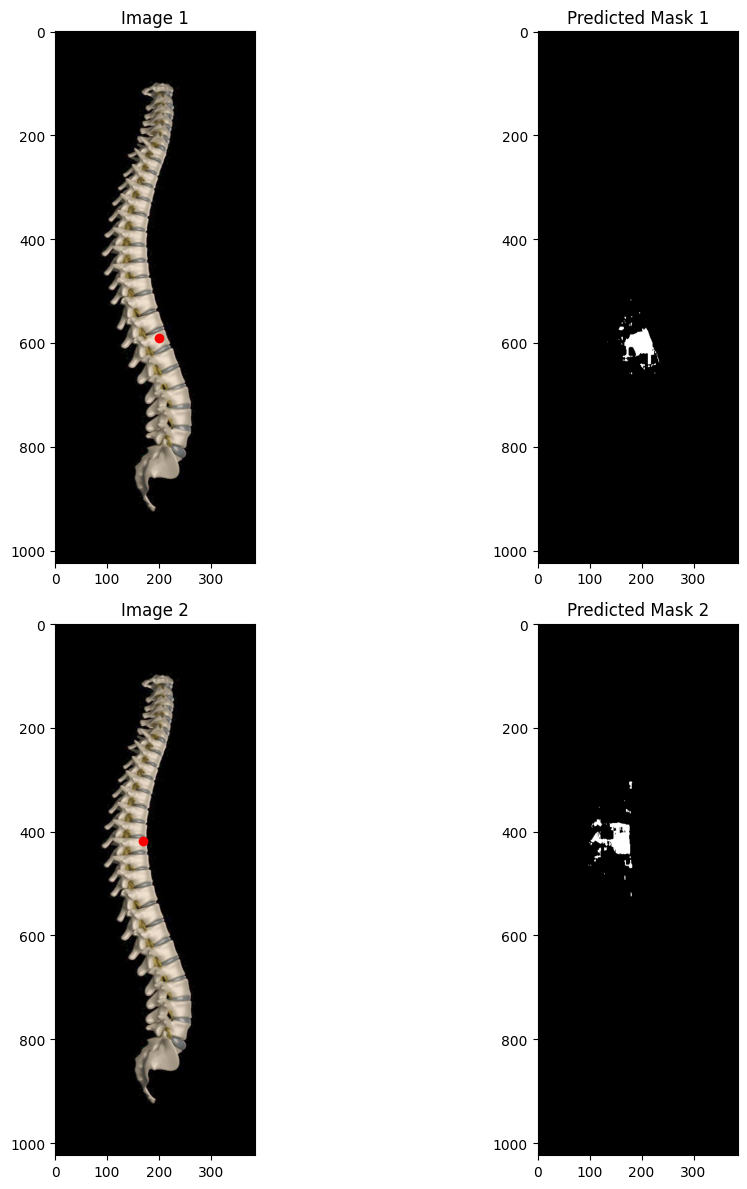

In [9]:
# segment image region using  fine tune model
# See Train.py on how to fine tune/train the model
import numpy as np
import torch
import cv2
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

# use bfloat16 for the entire script (memory efficient)
torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

def read_image(): # read and resize image and mask
        img = imread_from_url("https://p.turbosquid.com/ts-thumb/8v/dUakhI/SY1wPWzZ/o5/jpg/1435082563/1920x1080/fit_q87/3ef04343d9e3f396a4599ba93116de0c0b1f0a97/o5.jpg")

        # Resize image to maximum size of 1024

        r = np.min([1024 / img.shape[1], 1024 / img.shape[0]])
        img = cv2.resize(img, (int(img.shape[1] * r), int(img.shape[0] * r)))
        
        return img
image = read_image()
num_samples = 30 # number of points/segment to sample

input_points = np.array([[[[200,590]]],[[[170,417]]]])
# read image and sample points


# Load model you need to have pretrained model already made
sam2_checkpoint = "../checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
sam2_model = build_sam2(model_cfg, sam2_checkpoint, device="cuda")

# Build net and load weights
predictor = SAM2ImagePredictor(sam2_model)
predictor.model.load_state_dict(torch.load("../../../input/part-model/part-model1.torch"))

# predict mask
prd_masks = []
for input_point in input_points:
    with torch.no_grad():
            predictor.set_image(image)
            masks, scores, logits = predictor.predict(
                point_coords=input_point,
                point_labels=np.ones([input_point.shape[0],1])
            )
    prd_masks.append(masks[0])

import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(input_points), 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten for easier indexing (0 to 7)

for i in range(len(input_points)):
    # Plot original image with red point
    axes[2*i].imshow(image[:, :, ::-1])  # Convert BGR to RGB
    axes[2*i].scatter(input_points[i][0][0][0], input_points[i][0][0][1], color='red')
    axes[2*i].set_title(f"Image {i+1}")
    axes[2*i].axis('on')

    # Plot predicted mask
    axes[2*i + 1].imshow(prd_masks[i], cmap='gray')
    axes[2*i + 1].set_title(f"Predicted Mask {i+1}")
    axes[2*i + 1].axis('on')

plt.tight_layout()
plt.show()